## **Parsing friends from social networks and clustering them into interest groups / Парсинг друзей из социальных сетей и кластеризация их по группам по интересам**

## **1. Установка библиотек**

In [ ]:
!pip install vk

In [ ]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import datetime
import dateutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Подключение по токену**

### **2.1. Создание встраивоемого приложения в разделе "Разработчикам" на сайте vk.com и получение ID приложения**

In [ ]:
id_app = 12345678
id_us = 123456789

### **2.2. Запуск сессии**

In [ ]:
import vk

api = vk.API(access_token='6414g6336867h6764563a6431r55345234805195852c531252558db65f421rt242h8g40')

In [ ]:
version = 5.131

## **3. Выгрузка друзей**

In [ ]:
friends = api.friends.get(v = version, user_id=id_us)
print('Количество друзей:', friends['count'])

Количество друзей: 360


In [ ]:
friends.keys()

dict_keys(['count', 'items'])

In [ ]:
#friends2.keys()

In [ ]:
len(list(friends.get("items")))

360

In [ ]:
friends_ids_list = friends['items']
fields_name = [
               'first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count',
               'is_closed', 'can_access_closed', 'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default'
              ]

In [ ]:
dict_users_requests = {}
results = []

for friend in friends_ids_list:
  dict_results = {}
  dict_users_requests = {}
  print(f"user {friend}")
  for column in fields_name:
    try:
      dict_results = {column:
                      api.users.get(user_ids = friend,
                      v = version,
                      fields = column)[0][column]
                      }
    except:
      dict_results = {column: np.nan}
    finally:
      dict_users_requests.update(dict_results)
    time.sleep(0.15)
  results.append(dict_users_requests)

df = pd.DataFrame(results)

with pd.ExcelWriter('friends.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet_name_1')

user 2132738
user 3491909
user 8071379
user 18417226
user 19808197
user 22353623
user 23542163
user 24551752
user 25732412
user 30088364
user 30791572
user 38933760
user 39204285
user 42591590
user 44607711
user 45468357
user 47893699
user 48447189
user 49470647
user 49528524
user 52174456
user 53402103
user 57221217
user 60062919
user 64175031
user 64300874
user 67067043
user 68109226
user 70362276
user 70431661
user 72059225
user 72129879
user 73112511
user 74404607
user 77401858
user 77625702
user 78226186
user 79212838
user 80794768
user 80984760
user 81235449
user 83513879
user 88978698
user 90758476
user 92297409
user 92312273
user 93366901
user 93533153
user 93730453
user 94887089
user 94962284
user 95079235
user 95213108
user 95323827
user 95359506
user 95957437
user 97126832
user 97387294
user 97528994
user 98202377
user 99059518
user 99270124
user 100548999
user 100948776
user 103838894
user 103938961
user 105359459
user 105589410
user 105985602
user 107443972
user 108597355


In [ ]:
df.head(20)

,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,is_closed,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,Nikolay,Babichev,2132738,2,NaN,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,True,...,,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'pages': 132, 'subs...",1,NaN,NaN,owner
1,Nikita,Kislyakov,3491909,2,13.1,"{'id': 1, 'title': 'Russia'}",,1.0,2300.0,False,...,"Рассказываю о жизни и работе, пишу стихи и рас...",0.0,"[{'city': 1, 'country': 1, 'id': 128, 'name': ...",,NaN,"{'albums': 2, 'audios': 12, 'followers': 2300,...",1,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",,all
2,Devid,Shaforostov,8071379,2,NaN,"{'id': 1, 'title': 'Russia'}",Барнаул,1.0,192.0,False,...,Kurwa gryže!,0.0,[],,NaN,"{'albums': 0, 'audios': 565, 'followers': 192,...",1,NaN,,owner
3,Vladimir,Belokon,18417226,2,20.10,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,True,...,Себе же на зависть\n#HOMEDVIJ\n#24:01,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'pages': 45, 'subsc...",1,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",NaN,all
4,Irina,Turkina,19808197,1,22.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,802.0,False,...,,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'followers': 802, '...",1,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",,all
5,Daniil,Golubev,22353623,2,4.9,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,True,...,,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'pages': 20, 'subsc...",1,"{'id': 377, 'name': 'АГАУ', 'type': 'universit...",NaN,all
6,Seryozha,Bunyakov,23542163,2,4.6.1997,"{'id': 1, 'title': 'Russia'}",Москва,1.0,2339.0,False,...,ALL OF THE LIGHTS,4.0,"[{'city': 1, 'country': 1, 'faculty': 943, 'fa...",,NaN,"{'albums': 1, 'audios': 621, 'followers': 2339...",1,"{'id': 102946990, 'name': 'кэмп СЬ', 'type': '...",,all
7,Alex,Luk,24551752,2,1.1.2002,"{'id': 1, 'title': 'Russia'}",Пупкино,1.0,99.0,False,...,теперь её нет,3.0,[],,NaN,"{'albums': 8, 'audios': 0, 'followers': 99, 'p...",1,NaN,https://twitter.com/#!/aLexLukin,all
8,Alina,Scherbakova,25732412,2,7.6.1999,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,True,...,,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'pages': 47, 'subsc...",1,NaN,NaN,owner
9,Vyacheslav,Burdin,30088364,2,15.2,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,True,...,,NaN,NaN,,NaN,"{'albums': 0, 'audios': 0, 'pages': 8, 'subscr...",1,NaN,NaN,all


In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/friends.xlsx', sheet_name='Sheet_name_1')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/friends.xlsx')
df.head()

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,status,relation,universities,nickname,deactivated,counters,has_photo,occupation,site,wall_default
0,0,Nikolay,Babichev,2132738,2,NaN,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 132, 'subs...",1,NaN,NaN,owner
1,1,Nikita,Kislyakov,3491909,2,13.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,2300.0,...,"Рассказываю о жизни и работе, пишу стихи и рас...",0.0,"[{'city': 1, 'country': 1, 'id': 128, 'name': ...",NaN,NaN,"{'albums': 2, 'audios': 12, 'followers': 2300,...",1,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",NaN,all
2,2,Devid,Shaforostov,8071379,2,NaN,"{'id': 1, 'title': 'Russia'}",Барнаул,1.0,192.0,...,Kurwa gryže!,0.0,[],NaN,NaN,"{'albums': 0, 'audios': 565, 'followers': 192,...",1,NaN,NaN,owner
3,3,Vladimir,Belokon,18417226,2,20.10,"{'id': 1, 'title': 'Russia'}",NaN,1.0,NaN,...,Себе же на зависть\n#HOMEDVIJ\n#24:01,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'pages': 45, 'subsc...",1,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",NaN,all
4,4,Irina,Turkina,19808197,1,22.1,"{'id': 1, 'title': 'Russia'}",NaN,1.0,802.0,...,NaN,NaN,NaN,NaN,NaN,"{'albums': 0, 'audios': 0, 'followers': 802, '...",1,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",NaN,all


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 360 non-null    int64  
 1   first_name                 360 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         360 non-null    int64  
 4   sex                        360 non-null    int64  
 5   bdate                      299 non-null    object 
 6   country                    286 non-null    object 
 7   home_town                  68 non-null     object 
 8   has_mobile                 340 non-null    float64
 9   followers_count            257 non-null    float64
 10  is_closed                  340 non-null    float64
 11  can_access_closed          340 non-null    float64
 12  can_see_audio              340 non-null    float64
 13  online                     360 non-null    int64  

In [ ]:
len(df)

360

In [ ]:
import json

In [ ]:
for i in range(len(df)):
  try:
    df['country'][i] = json.loads(df['country'][i].replace("\'", "\"")).get('title')
  except:
    print(df['country'][i])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df['counters'][0])
print(json.loads(df['counters'][0].replace("\'", "\"")).get('albums'))

{'albums': 0, 'audios': 0, 'pages': 132, 'subscriptions': 9, 'videos': 0, 'posts': 468}
0


In [ ]:
cs = ['albums', 'audios', 'followers', 'pages', 'photos', 'subscriptions', 'videos', 'clips_followers' ]
for col in cs:
  df[f'media_{col}'] = np.nan

for i in range(len(df)):
  for col in cs:
    try:
      df[f'media_{col}'][i] = json.loads(df['counters'][i].replace("\'", "\"")).get(col)
    except:
      df[f'media_{col}'][i] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
list(json.loads(df['universities'][1].replace("\'", "\""))[0].keys())

['city', 'country', 'id', 'name']

In [ ]:
university = list(json.loads(df['universities'][1].replace("\'", "\""))[0].keys())

for uni in university:
  df[f'university_{uni}'] = np.nan

for i in range(len(df)):
  for uni in university:
    try:
      df[f'university_{uni}'][i] = json.loads(df['universities'][i].replace("\'", "\""))[0].get(uni)
    except:
      df[f'university_{uni}'][i] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 360 non-null    int64  
 1   first_name                 360 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         360 non-null    int64  
 4   sex                        360 non-null    int64  
 5   bdate                      299 non-null    object 
 6   country                    286 non-null    object 
 7   home_town                  68 non-null     object 
 8   has_mobile                 340 non-null    float64
 9   followers_count            257 non-null    float64
 10  is_closed                  340 non-null    float64
 11  can_access_closed          340 non-null    float64
 12  can_see_audio              340 non-null    float64
 13  online                     360 non-null    int64  

## **4. Работа с признаками**

In [ ]:
df_copy = df.copy(deep=True)

### **4.1. Удаление нулевых столбцов**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 360 non-null    int64  
 1   first_name                 360 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         360 non-null    int64  
 4   sex                        360 non-null    int64  
 5   bdate                      299 non-null    object 
 6   country                    286 non-null    object 
 7   home_town                  68 non-null     object 
 8   has_mobile                 340 non-null    float64
 9   followers_count            257 non-null    float64
 10  is_closed                  340 non-null    float64
 11  can_access_closed          340 non-null    float64
 12  can_see_audio              340 non-null    float64
 13  online                     360 non-null    int64  

In [ ]:
del df['timezone']
del df['contacts']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 360 non-null    int64  
 1   first_name                 360 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         360 non-null    int64  
 4   sex                        360 non-null    int64  
 5   bdate                      299 non-null    object 
 6   country                    286 non-null    object 
 7   home_town                  68 non-null     object 
 8   has_mobile                 340 non-null    float64
 9   followers_count            257 non-null    float64
 10  is_closed                  340 non-null    float64
 11  can_access_closed          340 non-null    float64
 12  can_see_audio              340 non-null    float64
 13  online                     360 non-null    int64  

### **4.2. Работа с признаком last_name**

In [ ]:
df[df['last_name'].isnull()]

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,media_followers,media_pages,media_photos,media_subscriptions,media_videos,media_clips_followers,university_city,university_country,university_id,university_name
81,81,DELETED,NaN,119305345,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,134,DELETED,NaN,147695211,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,139,DELETED,NaN,151216866,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,145,DELETED,NaN,153120839,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,202,DELETED,NaN,178318119,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,211,DELETED,NaN,185885637,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,294,DELETED,NaN,330528897,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,299,DELETED,NaN,344728183,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,307,DELETED,NaN,362930081,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,322,DELETED,NaN,416875524,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(df[df['last_name'].isnull()].index)

### **4.3. Работа с признаком id**

In [ ]:
df[df['id'].isnull()]

,Unnamed: 0,first_name,last_name,id,sex,bdate,country,home_town,has_mobile,followers_count,...,media_followers,media_pages,media_photos,media_subscriptions,media_videos,media_clips_followers,university_city,university_country,university_id,university_name


In [ ]:
df = df.drop(df[df['id'].isnull()].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   bdate                      299 non-null    object 
 6   country                    286 non-null    object 
 7   home_town                  68 non-null     object 
 8   has_mobile                 340 non-null    float64
 9   followers_count            257 non-null    float64
 10  is_closed                  340 non-null    float64
 11  can_access_closed          340 non-null    float64
 12  can_see_audio              340 non-null    float64
 13  online                     348 non-null    int64  

### **4.4. Работа с признаком sex**

In [ ]:
df.sex.unique()

array([2, 1])

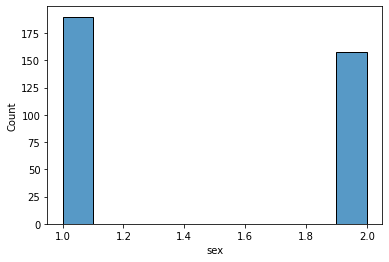

In [ ]:
sns.histplot(data = df, x = "sex")

In [ ]:
df = df[(df['sex']==1) | (df['sex'] == 2)]

1 - Кол-во Женщин
2 - Кол-во Мужчин

In [ ]:
df.sex.value_counts()

1    190
2    158
Name: sex, dtype: int64

### **4.5. Работа с признаком country**

In [ ]:
df.country.value_counts()

Russia            274
Czech Republic      2
Germany             2
USA                 1
Colombia            1
Ukraine             1
Italy               1
Jamaica             1
Netherlands         1
Kazakhstan          1
Azerbaijan          1
Name: country, dtype: int64

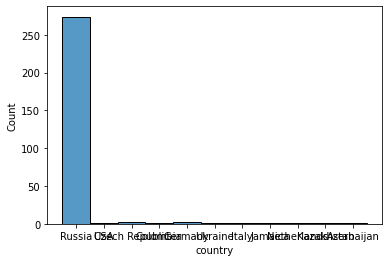

In [ ]:
sns.histplot(data = df, x = "country")

In [ ]:
del df["country"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   bdate                      299 non-null    object 
 6   home_town                  68 non-null     object 
 7   has_mobile                 340 non-null    float64
 8   followers_count            257 non-null    float64
 9   is_closed                  340 non-null    float64
 10  can_access_closed          340 non-null    float64
 11  can_see_audio              340 non-null    float64
 12  online                     348 non-null    int64  
 13  city                       224 non-null    object 

### **4.6. Работа с признаками bdate и age**

Создание функции для перевода даты рождения в возраст

In [ ]:
def date_2_age(df_func, column,new_column):
  days = []
  months = []
  years = []
  for_new_list = []
  today = datetime.datetime.utcnow()
  for elem in df_func[column]:
      if type(elem) == str:
        date_list = elem.split('.')
        if len(date_list) < 3:
          days.append(np.nan)
          months.append(np.nan)
          years.append(np.nan)
        else:
          days.append(date_list[0])
          months.append (date_list[1])
          years.append(date_list[2])
      if type(elem) == float:
        days.append (np.nan)
        months.append(np.nan)
        years.append(np.nan)

  for i in range(len(days)):
    if type(days[i]) == str:
      for_new_list.append(dateutil.relativedelta.relativedelta(today, datetime.date (int(years[i]),int(months[i]),int(days[i]))).years)

    else:
     for_new_list.append(np.nan)

  df_func[new_column] = for_new_list
  return df_func

df = date_2_age (df_func= df, column= 'bdate', new_column = 'age')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   bdate                      299 non-null    object 
 6   home_town                  68 non-null     object 
 7   has_mobile                 340 non-null    float64
 8   followers_count            257 non-null    float64
 9   is_closed                  340 non-null    float64
 10  can_access_closed          340 non-null    float64
 11  can_see_audio              340 non-null    float64
 12  online                     348 non-null    int64  
 13  city                       224 non-null    object 

Получили только половину пользователей, у которых указана дата рождения

In [ ]:
df.age.replace(np.nan, df["age"].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   bdate                      299 non-null    object 
 6   home_town                  68 non-null     object 
 7   has_mobile                 340 non-null    float64
 8   followers_count            257 non-null    float64
 9   is_closed                  340 non-null    float64
 10  can_access_closed          340 non-null    float64
 11  can_see_audio              340 non-null    float64
 12  online                     348 non-null    int64  
 13  city                       224 non-null    object 

In [ ]:
del df["bdate"]

### **4.7. Работа с признаком home_town**

In [ ]:
df.home_town.unique()

array([nan, 'Барнаул', 'Москва', 'Пупкино', 'Sweet Street', 'Бараул',
       'барнаул', 'Заринск', 'Kursk', 'Санкт- Петербург', 'GRIHANSK',
       'Рубцовск', 'Алейск', 'Краснодар', 'Оренбург', 'Новосибирск',
       'Стерлитамак', 'Санкт-Петербург', 'Донецк', 'Астана', 'Barnaul',
       'Tyumen'], dtype=object)

**Корректировка названий городов**

In [ ]:
df.home_town.replace('nan', 'Другой', inplace=True)
df.home_town.replace('', 'Другой', inplace=True)
df.home_town.replace('барнаул', 'Барнаул', inplace=True)
df.home_town.replace('Бараул', 'Барнаул', inplace=True)
df.home_town.replace('Barnaul', 'Барнаул', inplace=True)
df.home_town.replace('Москва ', 'Москва', inplace=True)
df.home_town.replace('МСК', 'Москва', inplace=True)
df.home_town.replace('москва-новосибирск-москва', 'Москва', inplace=True)
df.home_town.replace('Москва, Санкт-Петербург, Самара, Новосибирск', 'Москва', inplace=True)
df.home_town.replace('Теперь Москва', 'Москва', inplace=True)
df.home_town.replace('Потсдам, ГДР. А так-то Москалик, с более чем полувековым проживанием  в городе Москва.', 'Москва', inplace=True)
df.home_town.replace('Владикавказ, Москва', 'Москва', inplace=True)
df.home_town.replace('Петрозаводск, Санкт-Петербург', 'Петрозаводск', inplace=True)
df.home_town.replace('Санкт-Москвабург', 'Санкт-Петербург', inplace=True)
df.home_town.replace('Санкт- Петербург', 'Санкт-Петербург', inplace=True)
df.home_town.replace('Санкт-Петербург (Ленинград)', 'Санкт-Петербург', inplace=True)
df.home_town.replace('Петербург', 'Санкт-Петербург', inplace=True)
df.home_town.replace('Taganrog', 'Таганрог', inplace=True)
df.home_town.replace('г.рига', 'Рига', inplace=True)
df.home_town.replace('Рига, Латвийская ССР, СССР', 'Рига', inplace=True)
df.home_town.replace('Воронеж, Артёмовск, Ужгород', 'Воронеж', inplace=True)
df.home_town.replace('САРОВ', 'Саров', inplace=True)
df.home_town.replace('ДОНБАСС', 'Донбасс', inplace=True)
df.home_town.replace('Мегион, Ессентуки, Москва', 'Мегион', inplace=True)
df.home_town.replace('Ташкент-Санкт -Петербург-Краснодар', 'Ташкент', inplace=True)
df.home_town.replace('Sweet Street', 'Другой', inplace=True)
df.home_town.replace('Широка страна моя родная!', 'Другой', inplace=True)
df.home_town.replace('Показывать только месяц и день', 'Другой', inplace=True)
df.home_town.replace('Россия', 'Другой', inplace=True)
df.home_town.replace('Mars', 'Другой', inplace=True)
df.home_town.replace('Хотите петь мои песни? На здоровье!!! Минуса Качайте с моего официального сайта', 'Другой', inplace=True)
df.home_town.replace('Я', 'Другой', inplace=True)
df.home_town.replace('омск', 'Омск', inplace=True)
df.home_town.replace('владимир', 'Владимир', inplace=True)
df.home_town.replace('Kursk', 'Курск', inplace=True)
df.home_town.replace('кинель', 'Кинель', inplace=True)
df.home_town.replace('темрюк', 'Темрюк', inplace=True)
df.home_town.replace('волгодонск', 'Волгодонск', inplace=True)
df.home_town.replace('https://vk.com/club212482410', 'Другой', inplace=True)
df.home_town.replace(np.nan, 'Другой', inplace=True)

In [ ]:
df.home_town.unique()

array(['Другой', 'Барнаул', 'Москва', 'Пупкино', 'Заринск', 'Курск',
       'Санкт-Петербург', 'GRIHANSK', 'Рубцовск', 'Алейск', 'Краснодар',
       'Оренбург', 'Новосибирск', 'Стерлитамак', 'Донецк', 'Астана',
       'Tyumen'], dtype=object)

### **4.8. Работа с признаком has_mobile**

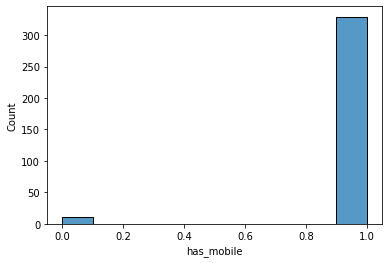

In [ ]:
sns.histplot(data = df, x = "has_mobile")

In [ ]:
df.has_mobile.value_counts()

1.0    329
0.0     11
Name: has_mobile, dtype: int64

Удаление признака has_mobile по причине наличия мобильного телефона у большинства

In [ ]:
df = df.drop (columns = ['has_mobile'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   home_town                  348 non-null    object 
 6   followers_count            257 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  online                     348 non-null    int64  
 11  city                       224 non-null    object 
 12  can_post                   348 non-null    int64  
 13  can_write_private_message  348 non-null    int64  

### **4.9. Работа с признаком followers_count**

In [ ]:
df.followers_count.value_counts()

255.0    3
4.0      3
107.0    3
0.0      3
131.0    3
        ..
480.0    1
969.0    1
86.0     1
707.0    1
34.0     1
Name: followers_count, Length: 207, dtype: int64

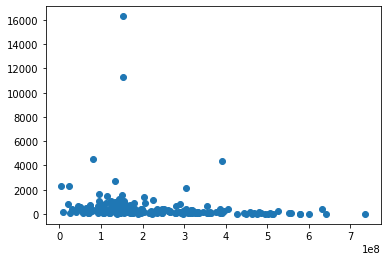

In [ ]:
plt.scatter (df.id, df.followers_count)

In [ ]:
df = df.drop(df[df.followers_count > 20000].index)

In [ ]:
df['followers_count'].isna().sum()

91

In [ ]:
mode_f = df['followers_count'].mode()

In [ ]:
df.followers_count.replace(np.nan, mode_f[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 359
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 348 non-null    int64  
 1   first_name                 348 non-null    object 
 2   last_name                  348 non-null    object 
 3   id                         348 non-null    int64  
 4   sex                        348 non-null    int64  
 5   home_town                  348 non-null    object 
 6   followers_count            348 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  online                     348 non-null    int64  
 11  city                       224 non-null    object 
 12  can_post                   348 non-null    int64  
 13  can_write_private_message  348 non-null    int64  

### **4.10. Работа с признаком is_closed**

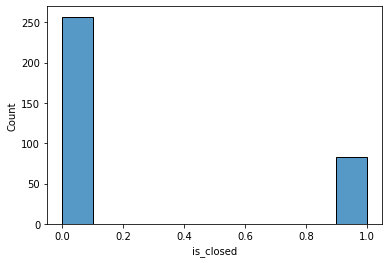

In [ ]:
sns.histplot(data = df, x = "is_closed")

In [ ]:
df = df.drop(df[df['is_closed'].isnull()].index)

In [ ]:
df.is_closed.value_counts()

0.0    257
1.0     83
Name: is_closed, dtype: int64

### **4.11. Работа с признаком can_access_closed**

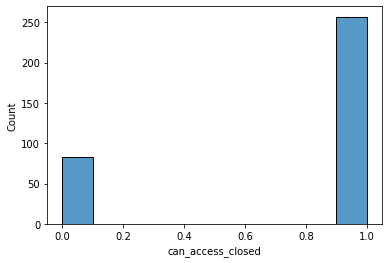

In [ ]:
sns.histplot(data = df, x = "can_access_closed")

In [ ]:
df['can_access_closed'].isna().sum()

0

In [ ]:
df = df.drop(df[df['can_access_closed'].isnull()].index)

In [ ]:
df.can_access_closed.value_counts()

1.0    257
0.0     83
Name: can_access_closed, dtype: int64

### **4.12. Работа с признаком can_see_audio**

In [ ]:
df.can_see_audio.value_counts()

0.0    248
1.0     92
Name: can_see_audio, dtype: int64

In [ ]:
df = df.drop(df[df['can_see_audio'].isnull()].index)

### **4.13. Работа с признаком can_see_all_posts**

In [ ]:
df.can_see_all_posts.value_counts()

0.0    239
1.0    101
Name: can_see_all_posts, dtype: int64

### **4.14. Работа с признаком online**

In [ ]:
#Признак с переменными значениями, следует удалить
del df['online']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

### **4.15. Работа с признаком can_post**

In [ ]:
df.can_post.value_counts()

0    318
1     22
Name: can_post, dtype: int64

In [ ]:
df = df.drop(df[df['can_post'].isnull()].index)

### **4.16. Работа с признаком can_write_private_message**

In [ ]:
df.can_write_private_message.value_counts()

1    212
0    128
Name: can_write_private_message, dtype: int64

In [ ]:
df = df.drop(df[df['can_write_private_message'].isnull()].index)

### **4.17. Работа с признаком can_see_all_posts**

In [ ]:
df.can_see_all_posts.value_counts()

0.0    239
1.0    101
Name: can_see_all_posts, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

### **4.18. Работа с признаками nickname и deactivated**

Удаление признака nickname из-за неиформативности

In [ ]:
del df["nickname"]

Удаление нулевого признака deactivated

In [ ]:
del df["deactivated"]

### **4.19. Работа с признаком status**

In [ ]:
df.status.value_counts()

Рассказываю о жизни и работе, пишу стихи и рассказы, мечтаю научиться петь и встретить любовь.    1
стать шкафом                                                                                      1
🍎🐍                                                                                                1
🙇🏿                                                                                                1
@hhedoonisstt                                                                                     1
                                                                                                 ..
Inst-mehikorealgoat                                                                               1
blinbliat'                                                                                        1
Лешмейкер┃Inst: @lash_studio22┃Обучение┃Inst: @vyatkina_lashcourse                                1
моя жизнь ведет меня в правильном направлении, я уверена                                          1


Проверка пустых значений статуса

In [ ]:
df["status"].isnull().sum()

183

Конвертация признака status в категориальный признак с двумя значениями

In [ ]:
df['status'].fillna(0, inplace = True)

In [ ]:
for i in df.status:
  if i != 0: df.status.replace(i, 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


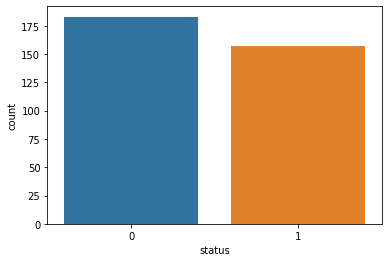

In [ ]:
sns.countplot(df.status)

### **4.20. Работа с признаком relation**

In [ ]:
df.relation.unique()

array([nan,  0.,  4.,  3.,  1.,  2.,  8.,  7.,  6.])

In [ ]:
df["relation"].isnull().sum()

227

In [ ]:
df['relation'].fillna(0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

### **4.21. Работа с признаком has_photo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


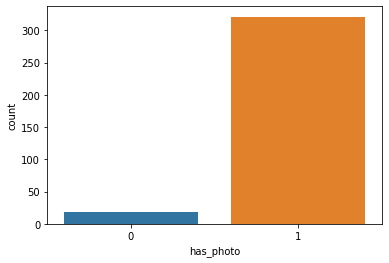

In [ ]:
sns.countplot(df.has_photo)

In [ ]:
del df["has_photo"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

### **4.22. Работа с признаком site**

In [ ]:
df.site.unique()

array([nan, 'https://twitter.com/#!/aLexLukin', '@shimadatattoo',
       'https://twitter.com/ooceansizze   https://www.instagram.com/florenchik/',
       'https://www.instagram.com/dmitry.shagov/ ',
       'https://t.me/huB4BuB4', 'http://www.youtube.com/андрейянес',
       'http://steamcommunity.com/id/nicetea2205/',
       'https://twitter.com/Dans_Kreep', 'kkorolga - new inst',
       'https://www.instagram.com/ssaanyaass/',
       '----------------------------------------------------',
       '.................................',
       '  http://sprashivai.ru/Yulia_Pergaeva', 'Инстаграм @stfn_karasev',
       'https://www.instagram.com/alvetrov/?hl=ru',
       'http://sprashivai.ru/Viktoria2221222   http://ask.fm/VI_23',
       'https://www.instagram.com/n.gorbatova/',
       'instagram.com/dorogo.vvs/', 'https://linktr.ee/m_o_n_o_r_a_m_a ',
       '***********', 'http://instgram.ru/nm_instaa',
       'http://instgram.ru/uhofaraona https://www.tumblr.com/blog/milahiddlston',
     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


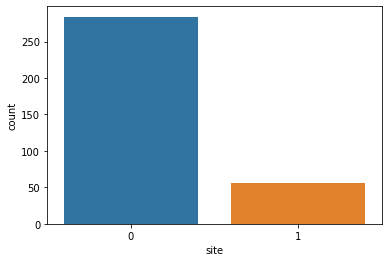

In [ ]:
df['site'].fillna(0, inplace = True)

for i in df.site:
  if i != 0:
    df.site.replace(i, 1, inplace=True)

sns.countplot(df.site)

### **4.23. Работа с признаком wall_default**

In [ ]:
df.wall_default.unique()

array(['owner', 'all'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


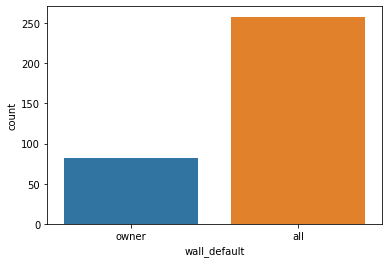

In [ ]:
sns.countplot(df.wall_default)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


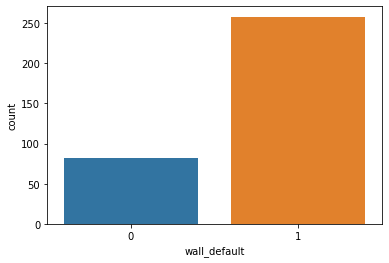

In [ ]:
df.wall_default.replace('all', 1, inplace=True)
df.wall_default.replace('owner', 0, inplace=True)
df.wall_default.replace(np.nan, 1, inplace=True)

sns.countplot(df.wall_default)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

In [ ]:
df.head(10)

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,...,media_pages,media_photos,media_subscriptions,media_videos,media_clips_followers,university_city,university_country,university_id,university_name,age
0,0,Nikolay,Babichev,2132738,2,Другой,0.0,1.0,0.0,0.0,...,132.0,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN,23.0
1,1,Nikita,Kislyakov,3491909,2,Другой,2300.0,0.0,1.0,1.0,...,20.0,149.0,4.0,43.0,11527.0,1.0,1.0,128.0,НИУ ВШЭ (ГУ-ВШЭ),23.0
2,2,Devid,Shaforostov,8071379,2,Барнаул,192.0,0.0,1.0,1.0,...,31.0,190.0,1.0,99.0,1274.0,NaN,NaN,NaN,NaN,23.0
3,3,Vladimir,Belokon,18417226,2,Другой,0.0,1.0,0.0,0.0,...,45.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,23.0
4,4,Irina,Turkina,19808197,1,Другой,802.0,0.0,1.0,0.0,...,41.0,71.0,0.0,216.0,1348.0,NaN,NaN,NaN,NaN,23.0
5,5,Daniil,Golubev,22353623,2,Другой,0.0,1.0,0.0,0.0,...,20.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,23.0
6,6,Seryozha,Bunyakov,23542163,2,Москва,2339.0,0.0,1.0,1.0,...,41.0,1974.0,76.0,200.0,8382.0,1.0,1.0,236.0,МГИМО МИД России,25.0
7,7,Alex,Luk,24551752,2,Пупкино,99.0,0.0,1.0,0.0,...,21.0,455.0,5.0,252.0,485.0,NaN,NaN,NaN,NaN,20.0
8,8,Alina,Scherbakova,25732412,2,Другой,0.0,1.0,0.0,0.0,...,47.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,23.0
9,9,Vyacheslav,Burdin,30088364,2,Другой,0.0,1.0,0.0,0.0,...,8.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,23.0


### **4.24. Работа с признаком university**

In [ ]:
del df["universities"]
del df["university_city"]
del df["university_country"]
##del df["university_education_status"]
##del df["university_faculty"]
##del df["university_faculty_name"]
##del df["university_graduation"]
del df["university_id"]
del df["university_name"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

### **4.25. Работа с признаками counters (media)**

In [ ]:
del df["counters"]

In [ ]:
df.head()

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,...,wall_default,media_albums,media_audios,media_followers,media_pages,media_photos,media_subscriptions,media_videos,media_clips_followers,age
0,0,Nikolay,Babichev,2132738,2,Другой,0.0,1.0,0.0,0.0,...,0,0.0,0.0,NaN,132.0,NaN,9.0,0.0,NaN,23.0
1,1,Nikita,Kislyakov,3491909,2,Другой,2300.0,0.0,1.0,1.0,...,1,2.0,12.0,2300.0,20.0,149.0,4.0,43.0,11527.0,23.0
2,2,Devid,Shaforostov,8071379,2,Барнаул,192.0,0.0,1.0,1.0,...,0,0.0,565.0,192.0,31.0,190.0,1.0,99.0,1274.0,23.0
3,3,Vladimir,Belokon,18417226,2,Другой,0.0,1.0,0.0,0.0,...,1,0.0,0.0,NaN,45.0,NaN,2.0,0.0,NaN,23.0
4,4,Irina,Turkina,19808197,1,Другой,802.0,0.0,1.0,0.0,...,1,0.0,0.0,802.0,41.0,71.0,0.0,216.0,1348.0,23.0


**media_albums**

In [ ]:
df.media_albums.replace(np.nan, df["media_albums"].mode()[0], inplace=True)

In [ ]:
df.media_albums.unique()

array([ 0.,  2.,  1.,  8.,  4.,  3., 10., 18.,  7.,  6., 14.,  5.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


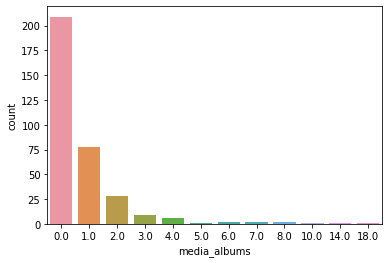

In [ ]:
sns.countplot(df.media_albums)

In [ ]:
del df["media_albums"]

**media_audios**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


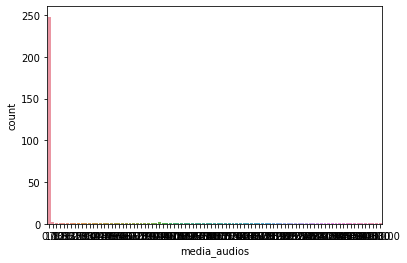

In [ ]:
df.media_audios.replace(np.nan, df["media_audios"].mode()[0], inplace=True)
sns.countplot(df.media_audios)

In [ ]:
del df["media_audios"]
del df["media_followers"]
del df["media_pages"]
del df["media_photos"]
del df["media_subscriptions"]
del df["media_videos"]
del df["media_clips_followers"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    float64
 7   is_closed                  340 non-null    float64
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    float64
 10  city                       224 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    float64

In [ ]:
df.head()

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,city,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age
0,0,Nikolay,Babichev,2132738,2,Другой,0.0,1.0,0.0,0.0,"{'id': 99, 'title': 'Novosibirsk'}",0,0,0.0,0,0.0,NaN,0,0,23.0
1,1,Nikita,Kislyakov,3491909,2,Другой,2300.0,0.0,1.0,1.0,"{'id': 25, 'title': 'Barnaul'}",0,0,0.0,1,0.0,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",0,1,23.0
2,2,Devid,Shaforostov,8071379,2,Барнаул,192.0,0.0,1.0,1.0,"{'id': 25, 'title': 'Barnaul'}",0,1,0.0,1,0.0,NaN,0,0,23.0
3,3,Vladimir,Belokon,18417226,2,Другой,0.0,1.0,0.0,0.0,"{'id': 25, 'title': 'Barnaul'}",0,0,0.0,1,0.0,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",0,1,23.0
4,4,Irina,Turkina,19808197,1,Другой,802.0,0.0,1.0,0.0,"{'id': 25, 'title': 'Barnaul'}",0,0,0.0,0,0.0,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",0,1,23.0


### **4.22. Работа с признаком city**

In [ ]:
df['city'].fillna("{'id': 11111, 'title': 'Other'}", inplace = True)

In [ ]:
df.city

0               {'id': 99, 'title': 'Novosibirsk'}
1                   {'id': 25, 'title': 'Barnaul'}
2                   {'id': 25, 'title': 'Barnaul'}
3                   {'id': 25, 'title': 'Barnaul'}
4                   {'id': 25, 'title': 'Barnaul'}
                          ...                     
354    {'id': 1957124, 'title': 'Nakhchivan City'}
356                 {'id': 147, 'title': 'Tyumen'}
357                 {'id': 25, 'title': 'Barnaul'}
358                 {'id': 25, 'title': 'Barnaul'}
359                 {'id': 25, 'title': 'Barnaul'}
Name: city, Length: 340, dtype: object

In [ ]:
df['city_new'] = 0

n = 0
for i in df.city:
  d = eval(i)
  df['city_new'][n] = d['title']
  n += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['is_closed'] = df.is_closed.astype(int)
df['can_see_audio'] = df.can_see_audio.astype(int)
df['can_see_all_posts'] = df.can_see_all_posts.astype(int)
df['followers_count'] = df.followers_count.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 359
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 340 non-null    int64  
 1   first_name                 340 non-null    object 
 2   last_name                  340 non-null    object 
 3   id                         340 non-null    int64  
 4   sex                        340 non-null    int64  
 5   home_town                  340 non-null    object 
 6   followers_count            340 non-null    int64  
 7   is_closed                  340 non-null    int64  
 8   can_access_closed          340 non-null    float64
 9   can_see_audio              340 non-null    int64  
 10  city                       340 non-null    object 
 11  can_post                   340 non-null    int64  
 12  can_write_private_message  340 non-null    int64  
 13  can_see_all_posts          340 non-null    int64  

In [ ]:
df

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,...,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age,city_new
0,0,Nikolay,Babichev,2132738,2,Другой,0,1,0.0,0,...,0,0,0,0,0.0,NaN,0,0,23.0,Novosibirsk
1,1,Nikita,Kislyakov,3491909,2,Другой,2300,0,1.0,1,...,0,0,0,1,0.0,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",0,1,23.0,Barnaul
2,2,Devid,Shaforostov,8071379,2,Барнаул,192,0,1.0,1,...,0,1,0,1,0.0,NaN,0,0,23.0,Barnaul
3,3,Vladimir,Belokon,18417226,2,Другой,0,1,0.0,0,...,0,0,0,1,0.0,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",0,1,23.0,Barnaul
4,4,Irina,Turkina,19808197,1,Другой,802,0,1.0,0,...,0,0,0,0,0.0,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",0,1,23.0,Barnaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,Leonid,Griboedov,603579266,2,Другой,0,1,0.0,0,...,0,1,0,1,0.0,"{'id': 1168353, 'name': 'NU (УН, бывш. НЧУ, NO...",0,1,21.0,0
356,356,Darya,Galenzina,630595799,1,Tyumen,381,0,1.0,0,...,0,1,1,1,0.0,"{'id': 211522176, 'name': 'Vibe.art.d', 'type'...",0,1,25.0,0
357,357,German,Saul-Aaron,641743403,2,Барнаул,34,0,1.0,1,...,0,1,1,1,4.0,"{'id': 51766, 'name': 'Школа № 125', 'type': '...",1,1,19.0,0
358,358,Alexey,Tovarka,735775879,2,Барнаул,4,0,1.0,0,...,0,1,1,1,0.0,"{'id': 214066682, 'name': 'BAGS SHOP|МАГАЗИН Б...",0,1,23.0,0


In [ ]:
from sklearn.preprocessing import *
le = LabelEncoder()
df2 = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [ ]:
df2

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,...,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age,city_new
0,0,86,15,163,1,6,0,1,0,0,...,0,0,0,0,0,0,0,0,8,13
1,1,85,123,236,1,6,71,0,1,1,...,0,0,0,1,0,51,0,1,8,2
2,108,29,242,315,1,4,52,0,1,1,...,0,1,0,1,0,0,0,0,8,2
3,212,131,20,142,1,6,0,1,0,0,...,0,0,0,1,0,22,0,1,8,2
4,275,50,295,157,0,6,188,0,1,0,...,0,0,0,0,0,67,0,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,267,64,91,297,1,6,0,1,0,0,...,0,1,0,1,0,12,0,1,6,0
356,268,24,78,298,0,1,123,0,1,0,...,0,1,1,1,0,44,0,1,10,0
357,269,44,236,299,1,4,109,0,1,1,...,0,1,1,1,4,77,1,1,4,0
358,270,6,287,309,1,4,129,0,1,0,...,0,1,1,1,0,47,0,1,8,0


### **5. Преобразование категориальных признаков в числовые**

In [ ]:
df_le = df.copy(deep=True)
categorical_feature_mask = df_le.dtypes==object
categorical_cols = df_le.columns[categorical_feature_mask].tolist()
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [ ]:
df_le

,Unnamed: 0,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,...,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age,city_new
0,0,Nikolay,Babichev,2132738,2,Другой,0,1,0.0,0,...,0,0,0,0,0.0,NaN,0,0,23.0,Novosibirsk
1,1,Nikita,Kislyakov,3491909,2,Другой,2300,0,1.0,1,...,0,0,0,1,0.0,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",0,1,23.0,Barnaul
2,2,Devid,Shaforostov,8071379,2,Барнаул,192,0,1.0,1,...,0,1,0,1,0.0,NaN,0,0,23.0,Barnaul
3,3,Vladimir,Belokon,18417226,2,Другой,0,1,0.0,0,...,0,0,0,1,0.0,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",0,1,23.0,Barnaul
4,4,Irina,Turkina,19808197,1,Другой,802,0,1.0,0,...,0,0,0,0,0.0,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",0,1,23.0,Barnaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,Leonid,Griboedov,603579266,2,Другой,0,1,0.0,0,...,0,1,0,1,0.0,"{'id': 1168353, 'name': 'NU (УН, бывш. НЧУ, NO...",0,1,21.0,0
356,356,Darya,Galenzina,630595799,1,Tyumen,381,0,1.0,0,...,0,1,1,1,0.0,"{'id': 211522176, 'name': 'Vibe.art.d', 'type'...",0,1,25.0,0
357,357,German,Saul-Aaron,641743403,2,Барнаул,34,0,1.0,1,...,0,1,1,1,4.0,"{'id': 51766, 'name': 'Школа № 125', 'type': '...",1,1,19.0,0
358,358,Alexey,Tovarka,735775879,2,Барнаул,4,0,1.0,0,...,0,1,1,1,0.0,"{'id': 214066682, 'name': 'BAGS SHOP|МАГАЗИН Б...",0,1,23.0,0


In [ ]:
df101 = df

### **6. Создание набора данных числовых признаков**

In [ ]:
digit_feature_mask = df101.dtypes==int
digit_cols = df101.columns[digit_feature_mask].tolist()

In [ ]:
digit_cols

['Unnamed: 0',
 'first_name',
 'last_name',
 'id',
 'sex',
 'home_town',
 'followers_count',
 'is_closed',
 'can_access_closed',
 'can_see_audio',
 'city',
 'can_post',
 'can_write_private_message',
 'can_see_all_posts',
 'status',
 'relation',
 'occupation',
 'site',
 'wall_default',
 'age',
 'city_new']

In [ ]:
df_digit = df101[[
 'id',
 'sex',
 'home_town',
 'followers_count',
 'is_closed',
 'can_access_closed',
 'can_see_audio',
 'city',
 'can_post',
 'can_write_private_message',
 'can_see_all_posts',
 'status',
 'relation',
 'site',
 'wall_default',
 'age',
 'city_new']]

### **7. Тепловая карта числовых признаков**

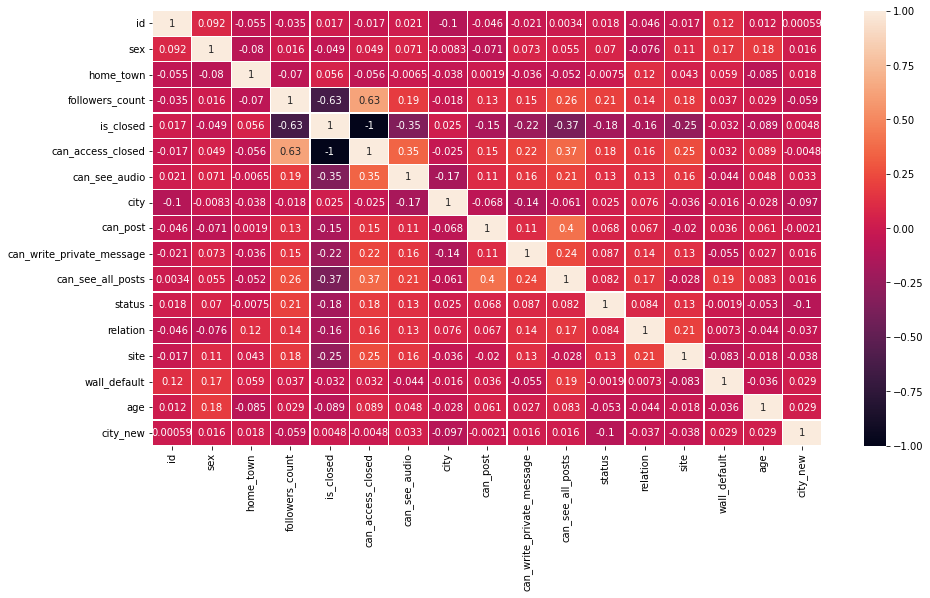

In [ ]:
sns.heatmap(df_digit.corr(), annot=True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(15,8)

### **8. Создание готового набора данных для проведения кластеризации**

In [ ]:
data = pd.concat([df_digit, df_le], axis=1)

In [ ]:
data.head()

,id,sex,home_town,followers_count,is_closed,can_access_closed,can_see_audio,city,can_post,can_write_private_message,...,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age,city_new
0,163,1,6,0,1,0,0,20,0,0,...,0,0,0,0,0.0,NaN,0,0,23.0,Novosibirsk
1,236,1,6,71,0,1,1,12,0,0,...,0,0,0,1,0.0,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",0,1,23.0,Barnaul
2,315,1,4,52,0,1,1,12,0,1,...,0,1,0,1,0.0,NaN,0,0,23.0,Barnaul
3,142,1,6,0,1,0,0,12,0,0,...,0,0,0,1,0.0,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",0,1,23.0,Barnaul
4,157,0,6,188,0,1,0,12,0,0,...,0,0,0,0,0.0,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",0,1,23.0,Barnaul


In [ ]:
data.columns

Index(['id', 'sex', 'home_town', 'followers_count', 'is_closed',
       'can_access_closed', 'can_see_audio', 'city', 'can_post',
       'can_write_private_message', 'can_see_all_posts', 'status', 'relation',
       'site', 'wall_default', 'age', 'city_new', 'Unnamed: 0', 'first_name',
       'last_name', 'id', 'sex', 'home_town', 'followers_count', 'is_closed',
       'can_access_closed', 'can_see_audio', 'city', 'can_post',
       'can_write_private_message', 'can_see_all_posts', 'status', 'relation',
       'occupation', 'site', 'wall_default', 'age', 'city_new'],
      dtype='object')

### **9. Применение методов Scaler к набору данных**

In [ ]:
df_norm = df.copy(deep=True)
df_minmax = df.copy(deep=True)
df_stand = df.copy(deep=True)
df_maxabs = df.copy(deep=True)
df_robust = df.copy(deep=True)
df_powert = df.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

In [ ]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### **10. Создание конвейера для подбора лучшей модели**

In [ ]:
from sklearn.cluster import *
from sklearn.metrics import *

In [ ]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(),
           AffinityPropagation(),
           AgglomerativeClustering(),
           MeanShift()]

metrics = pd.DataFrame(columns=['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [ ]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
53,AgglomerativeClustering,RobustScaler,0.43256,1.11361,-
23,AgglomerativeClustering,RobustScaler,0.43256,1.11361,-
54,MeanShift,RobustScaler,0.36304,0.73343,-
24,MeanShift,RobustScaler,0.36304,0.73343,-
4,MeanShift,Normalizer,0.30256,1.13996,-
34,MeanShift,Normalizer,0.30256,1.13996,-
14,MeanShift,StandardScaler,0.2726,1.14624,-
44,MeanShift,StandardScaler,0.2726,1.14624,-
59,MeanShift,PowerTransformer,0.25357,0.83798,-
29,MeanShift,PowerTransformer,0.25357,0.83798,-


In [ ]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

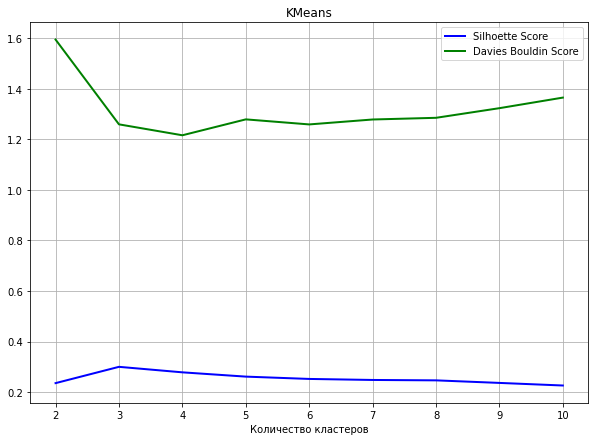

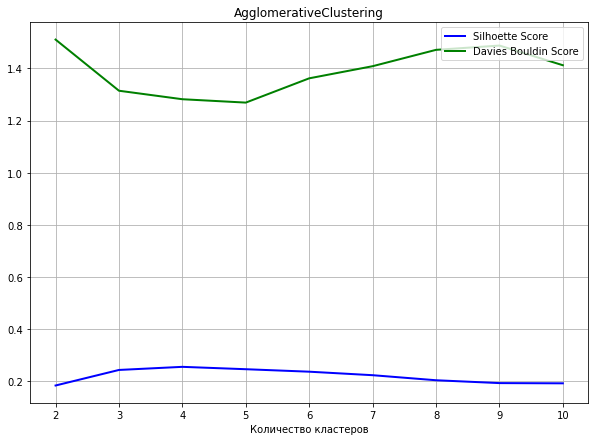

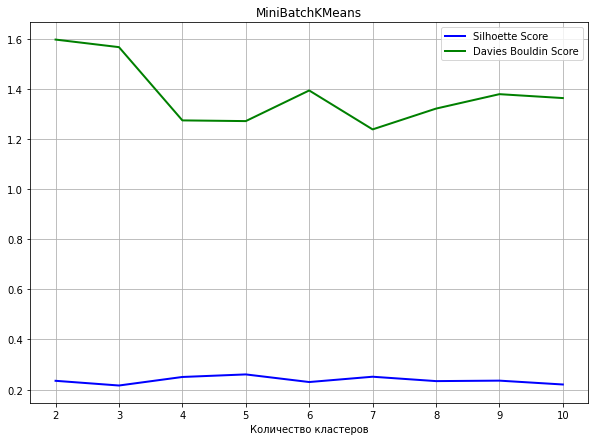

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

In [ ]:
x = df_robust
est = AgglomerativeClustering(n_clusters=3)
est.fit(x)

AgglomerativeClustering(n_clusters=3)

In [ ]:
print('SS/DBS',
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))

SS/DBS 0.44779 / 1.03731


In [ ]:
df.insert(1, "newcol", np.array(est.labels_))

In [ ]:
np.array(est.labels_)

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


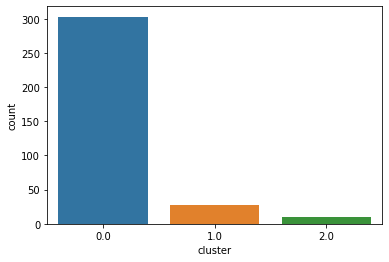

In [ ]:
labels = pd.DataFrame(est.labels_)
labels.columns = ['cluster']
df_clusters = pd.concat([df101, labels], axis=1)

sns.countplot(df_clusters.cluster)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


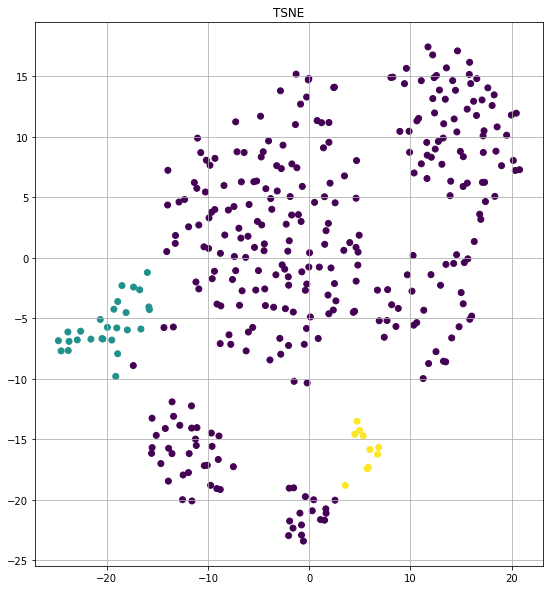

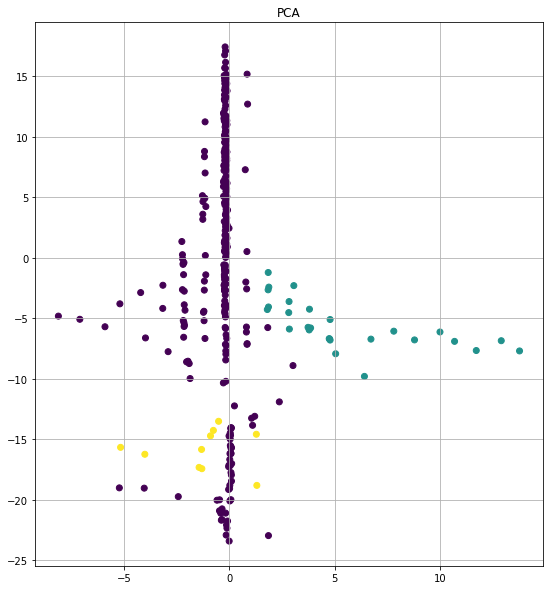

In [ ]:
from sklearn.manifold import *
from sklearn.decomposition import PCA

x = df_robust

tsne = TSNE(n_components=2
            ,random_state=22
            ).fit_transform(x)

pca = PCA().fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=est.labels_)
plt.title('TSNE')
plt.grid(True)

plt.figure(figsize=(20, 10))
plt.subplot(122)
plt.scatter(pca[:, 0], tsne[:, 1], c=est.labels_)
plt.title('PCA')
plt.grid(True)

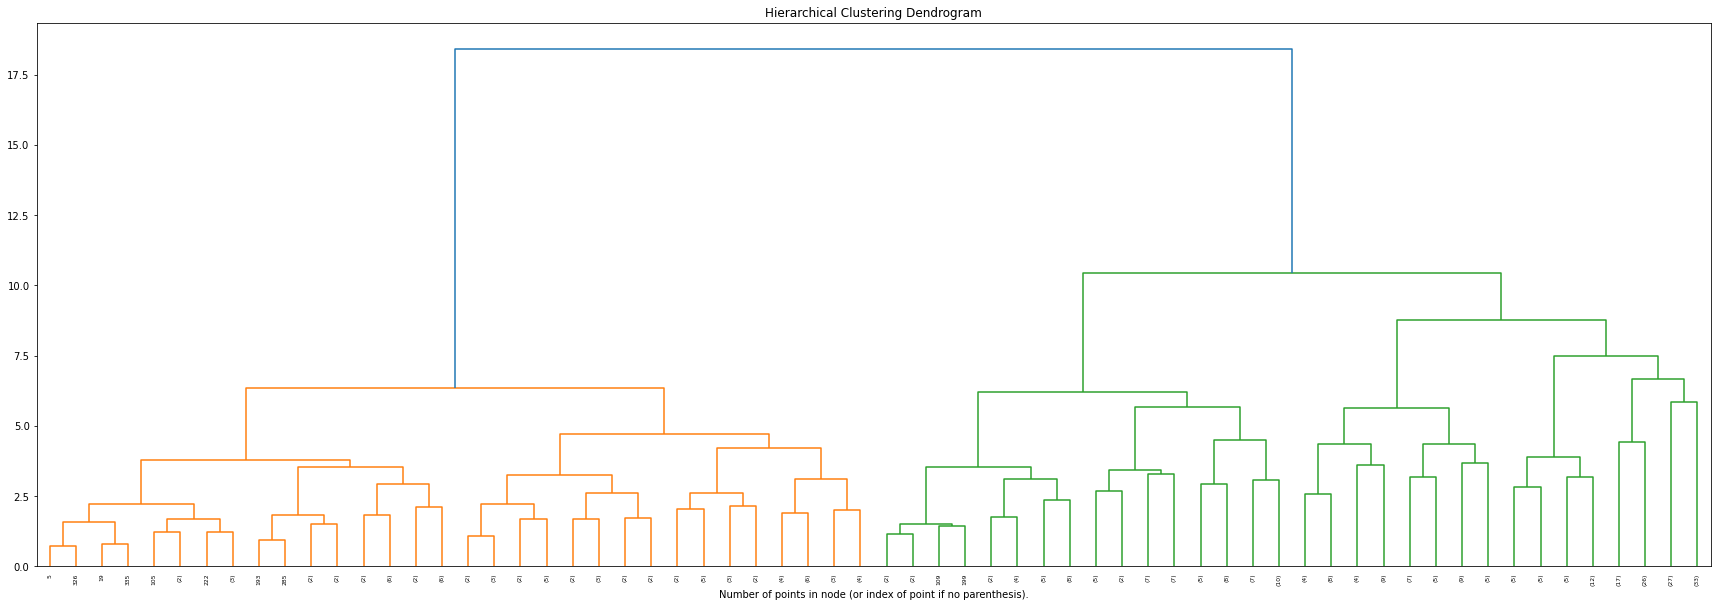

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
mend_df =  df.drop(columns = ['Unnamed: 0','first_name', 'last_name', 'home_town', 'city', 'status', 'site', 'city_new'])

In [ ]:
mend_df = mend_df.groupby('newcol').mean()
mend_df

,id,sex,followers_count,is_closed,can_access_closed,can_see_audio,can_post,can_write_private_message,can_see_all_posts,relation,occupation,wall_default,age
newcol,,,,,,,,,,,,,
0,167.052805,0.429043,73.953795,0.260726,0.739274,0.260726,0.056106,0.623762,0.283828,0.293729,31.495050,0.755776,7.702970
1,201.222222,0.777778,80.888889,0.148148,0.851852,0.370370,0.148148,0.629630,0.407407,0.148148,18.481481,0.740741,13.666667
2,158.000000,0.300000,80.200000,0.000000,1.000000,0.300000,0.100000,0.600000,0.400000,2.000000,21.100000,0.900000,7.700000


* Cluster 1  - almost everyone has different privacy activation settings, we offer them the use of tools to reduce the digital footprint, for example, VPN
- 1 кластер - почти у всех стоят различные настройки активации приватности,
предлагаем им использование средств для уменьшения цифрового следа, например, VPN
* Cluster 2  - users with early registration, active Internet users, "prosy", we offer them new interesting IT projects (crypta, nft)
- 2 кластер - пользователи с ранней регистрацией, активные пользователи Интернета, "прошаренные", предлагаем им новый интересные айти-проекты (крипта, nft)
* Cluster 3 - most subscribers, active users of the social network, we offer services to promote their account on the social network
- 3 кластер - больше всего подписчиков, активные пользователи социальной сети, предлагаем услуги по продвижению их аккаунта в социальной сети


In [ ]:
df_le.insert(1, "newcol", np.array(est.labels_))

In [ ]:
df_le

,Unnamed: 0,newcol,first_name,last_name,id,sex,home_town,followers_count,is_closed,can_access_closed,...,can_post,can_write_private_message,can_see_all_posts,status,relation,occupation,site,wall_default,age,city_new
0,0,0,Nikolay,Babichev,2132738,2,Другой,0,1,0.0,...,0,0,0,0,0.0,NaN,0,0,23.0,Novosibirsk
1,1,0,Nikita,Kislyakov,3491909,2,Другой,2300,0,1.0,...,0,0,0,1,0.0,"{'id': 28915774, 'name': 'ОТС-Горсайт', 'type'...",0,1,23.0,Barnaul
2,2,0,Devid,Shaforostov,8071379,2,Барнаул,192,0,1.0,...,0,1,0,1,0.0,NaN,0,0,23.0,Barnaul
3,3,0,Vladimir,Belokon,18417226,2,Другой,0,1,0.0,...,0,0,0,1,0.0,"{'id': 155911724, 'name': '#HOMEDVIJ #24:01', ...",0,1,23.0,Barnaul
4,4,0,Irina,Turkina,19808197,1,Другой,802,0,1.0,...,0,0,0,0,0.0,"{'id': 381, 'name': 'АлтГУ', 'type': 'universi...",0,1,23.0,Barnaul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,0,Leonid,Griboedov,603579266,2,Другой,0,1,0.0,...,0,1,0,1,0.0,"{'id': 1168353, 'name': 'NU (УН, бывш. НЧУ, NO...",0,1,21.0,0
356,356,0,Darya,Galenzina,630595799,1,Tyumen,381,0,1.0,...,0,1,1,1,0.0,"{'id': 211522176, 'name': 'Vibe.art.d', 'type'...",0,1,25.0,0
357,357,0,German,Saul-Aaron,641743403,2,Барнаул,34,0,1.0,...,0,1,1,1,4.0,"{'id': 51766, 'name': 'Школа № 125', 'type': '...",1,1,19.0,0
358,358,0,Alexey,Tovarka,735775879,2,Барнаул,4,0,1.0,...,0,1,1,1,0.0,"{'id': 214066682, 'name': 'BAGS SHOP|МАГАЗИН Б...",0,1,23.0,0


In [ ]:
import ipywidgets as widgets

In [ ]:
clusters={}
clusters["Невидимки"] = df_le[df_le["newcol"] == 0]
clusters["Прошаренные"]=df_le[df_le["newcol"] == 1]
clusters["Активные"]=df_le[df_le["newcol"] == 2]

In [ ]:
cluster=widgets.Dropdown(
    options=clusters.keys(),
    value=list(clusters.keys())[0],
    description = "Кластер"
)
knopka=widgets.Button(description='Сформировать список id')
def kk(a):
  t=clusters[cluster.value]
  print(df_le[["id","first_name", "last_name"]])
  print(list(t.index))
  print()
knopka.on_click(kk)
m=[cluster, knopka]
widgets.VBox(children=m)

            id first_name    last_name
0      2132738    Nikolay     Babichev
1      3491909     Nikita    Kislyakov
2      8071379      Devid  Shaforostov
3     18417226   Vladimir      Belokon
4     19808197      Irina      Turkina
..         ...        ...          ...
354  603579266     Leonid    Griboedov
356  630595799      Darya    Galenzina
357  641743403     German   Saul-Aaron
358  735775879     Alexey      Tovarka
359  737077015  Alexandra   Kucherenko

[340 rows x 3 columns]
[6, 7, 96, 142, 161, 198, 238, 256, 285, 346]

